<a href="https://colab.research.google.com/github/NataliaDiaz/colab/blob/master/Neural_Networks_Part_2_MI203_TD4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP optimisation d'un réseau de neurones

L'objectif de ce TP est de manipuler les notions liées à l'optimisation de réseau de neurones.

L'idée est de partir d'un code qui fonctionne avec torch (torch faisant toute l'optimisation) et d'essayer de supprimer un maximum de fonction de torch.

**CEPENDANT, si vous n'avez pas fini le précédent TP, il est préférable de le terminer (convolution / pooling) plutôt que de commencer celui ci**

In [0]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.autograd
import torch.autograd.variable

from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import clear_output
from time import sleep

def visualize_current_model_behaviour(X,Y,model):
    grid = np.ones((50,50,3),dtype=int)*255
    
    batch = np.zeros((50*50,2),dtype=float)
    for row in range(50):
        for col in range(50):
            batch[row*50+col][0]=row
            batch[row*50+col][1]=col
    prediction = model.getPredictedClass(batch)
    
    pred = np.ones((50,50,3),dtype=int)*255
    for row in range(50):
        for col in range(50):
            if prediction[row*50+col] == 1:
                grid[row][col][0]=175
                grid[row][col][2]=175
            else:
                grid[row][col][0]=175
                grid[row][col][1]=175
    
    for i in range(X.shape[0]):
        row,col = X[i][0],X[i][1]
        if Y[i]==1:
            grid[row][col][0]=0
            grid[row][col][2]=0
        else:
            grid[row][col][0]=0
            grid[row][col][1]=0
    
    return grid


def train_test_deep_network(X,Y,model,nbIteration):
    model.updateweights((X,Y))

    for iteration in range(nbIteration-1):
        loss = model.updateweights((X,Y))
        
        if iteration%50==0:
          visu = visualize_current_model_behaviour(X,Y,model)

          clear_output()
          plt.imshow(visu)
          plt.show()
          sleep(3)


class Net(nn.Module):
    def getPredictedClass(self,x):
        variablex = torch.autograd.Variable(torch.Tensor(x.astype(float)))
        variableoutput = self.forward(variablex)
        prob = variableoutput.cpu().data.numpy()
        return np.argmax(prob,axis=1)
    
    def updateweights(self,batchfromtrain):
        x,y = batchfromtrain
        variablex = torch.autograd.Variable(torch.Tensor(x.astype(float)))
        variabley = torch.autograd.Variable(torch.from_numpy(y).long())
        variableoutput = self.forward(variablex)
        
        loss = self.losslayer(variableoutput,variabley)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()        
        return loss.cpu().data.numpy()
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 30, bias=True)
        self.fc2 = nn.Linear(30, 30, bias=True)
        self.fc2bis = nn.Linear(30, 30, bias=True)
        self.fc3 = nn.Linear(30, 2, bias=True)
        
        self.train()
        
        
        self.lr = 0.1
        self.momentum = 0.5
        self.optimizer = optim.SGD(self.parameters(), lr=self.lr, momentum=self.momentum)
        self.losslayer = nn.CrossEntropyLoss()

    def forward(self, x):
        x = F.leaky_relu(self.fc1(x/30))
        x = F.leaky_relu(self.fc2(x))
        x = F.leaky_relu(self.fc2bis(x))
        x = self.fc3(x)
        return x

ci dessus un exemple de code d'apprentissage : tout est fait dans la fonction model.updateweights((X,Y))

notamment, dans les 3 lignes de code 
self.optimizer.zero_grad()
loss.backward()
self.optimizer.step()    

ci dessous, un exemple de comment on s'en sert sur des données

Penser aussi à jeter un coup d'oeil à https://playground.tensorflow.org qui fait globalement la même chose que le code ci dessus mais en beaucoup mieux et en beaucoup plus beau


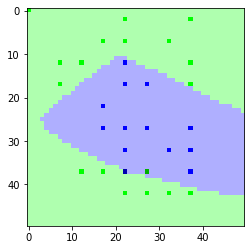

In [0]:
model = Net()

Y = np.array([1,1,1,1,1,1,1,1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,1,1,1])
Y = np.maximum(Y,np.zeros(Y.shape[0]))
X = np.zeros((Y.shape[0],2),dtype=int)
X[ 1 ]=np.array([ 2 , 22 ])
X[ 2 ]=np.array([ 2 , 37 ])
X[ 3 ]=np.array([ 7 , 17 ])
X[ 4 ]=np.array([ 7 , 22 ])
X[ 5 ]=np.array([ 7 , 32 ])
X[ 6 ]=np.array([ 12 , 7 ])
X[ 7 ]=np.array([ 12 , 12 ])
X[ 8 ]=np.array([ 12 , 22 ])
X[ 9 ]=np.array([ 12 , 37 ])
X[ 10 ]=np.array([ 17 , 7 ])
X[ 11 ]=np.array([ 17 , 22 ])
X[ 12 ]=np.array([ 17 , 27 ])
X[ 13 ]=np.array([ 17 , 37 ])
X[ 14 ]=np.array([ 22 , 17 ])
X[ 15 ]=np.array([ 27 , 17 ])
X[ 16 ]=np.array([ 27 , 22 ])
X[ 17 ]=np.array([ 27 , 27 ])
X[ 18 ]=np.array([ 27 , 37 ])
X[ 19 ]=np.array([ 32 , 22 ])
X[ 20 ]=np.array([ 32 , 32 ])
X[ 21 ]=np.array([ 32 , 37 ])
X[ 22 ]=np.array([ 37 , 12 ])
X[ 23 ]=np.array([ 37 , 17 ])
X[ 24 ]=np.array([ 37 , 22 ])
X[ 25 ]=np.array([ 37 , 27 ])
X[ 26 ]=np.array([ 37 , 37 ])
X[ 27 ]=np.array([ 42 , 22 ])
X[ 28 ]=np.array([ 42 , 27 ])
X[ 29 ]=np.array([ 42 , 32 ])
X[ 30 ]=np.array([ 42 , 37 ])


train_test_deep_network(X,Y,model,300)

**L'objectif de ce TP est de coder vous même : loss.backward() et self.optimizer.step()**

Penser à vous aider de la documentation https://pytorch.org/ et de numpy !

**IMPORTANT :**

les couches sont donc désormais des objets numpy !

la loss ne peut plus être une cross entropy... à la place, utiliser la hingeloss : loss = model.relu(1-y*(proba_classe_1-proba_classe_0))

ne chercher pas à visualiser en même temps que vous calculer (c'est déjà assez compliqué) - chercher juste à diminuer la loss

**coder l'optimisation dans la cellule "NET" puis lancer (plusieurs fois d'affiler) la cellule d'après - la loss doit diminuer - chaque lancer correspond à 10 pas de gradient**



In [0]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.autograd
import torch.autograd.variable

import collections 
from sklearn.utils import shuffle

class Net(nn.Module):
    def updateweights(self,batch):
        allX,allY = batch
        allX,allY = shuffle(allX,allY)
        totalloss = 0
        
        for sample in range(len(allX)):
            x = allX[sample].copy()
            y = allY[sample].copy()
        
            print("TODO")
    
        return totalloss
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = np.random.randn(30,2)
        self.fc1bias = np.random.randn(30)
        
        self.fc2 = np.random.randn(30,30)
        self.fc2bias = np.random.randn(30)
        
        self.fc2bis = np.random.randn(30,30)
        self.fc2biasbis = np.random.randn(30)
        
        self.fc3 = np.random.randn(2,30)
        self.fc3bias = np.random.randn(2)
        
        self.w = [self.fc1,self.fc2,self.fc2bis,self.fc3]
        self.b = [self.fc1bias,self.fc2bias,self.fc2biasbis,self.fc3bias]

    def leaky_relu(self,v):
        if v>0:
            return v
        else:
            return v/100
    def relu(self,v):
        if v>0:
            return v
        else:
            return 0
        
model = Net()

Y = np.array([1,1,1,1,1,1,1,1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,1,1,1])
Y = np.maximum(Y,np.zeros(Y.shape[0]))
X = np.zeros((Y.shape[0],2),dtype=int)
X[ 1 ]=np.array([ 2 , 22 ])
X[ 2 ]=np.array([ 2 , 37 ])
X[ 3 ]=np.array([ 7 , 17 ])
X[ 4 ]=np.array([ 7 , 22 ])
X[ 5 ]=np.array([ 7 , 32 ])
X[ 6 ]=np.array([ 12 , 7 ])
X[ 7 ]=np.array([ 12 , 12 ])
X[ 8 ]=np.array([ 12 , 22 ])
X[ 9 ]=np.array([ 12 , 37 ])
X[ 10 ]=np.array([ 17 , 7 ])
X[ 11 ]=np.array([ 17 , 22 ])
X[ 12 ]=np.array([ 17 , 27 ])
X[ 13 ]=np.array([ 17 , 37 ])
X[ 14 ]=np.array([ 22 , 17 ])
X[ 15 ]=np.array([ 27 , 17 ])
X[ 16 ]=np.array([ 27 , 22 ])
X[ 17 ]=np.array([ 27 , 27 ])
X[ 18 ]=np.array([ 27 , 37 ])
X[ 19 ]=np.array([ 32 , 22 ])
X[ 20 ]=np.array([ 32 , 32 ])
X[ 21 ]=np.array([ 32 , 37 ])
X[ 22 ]=np.array([ 37 , 12 ])
X[ 23 ]=np.array([ 37 , 17 ])
X[ 24 ]=np.array([ 37 , 22 ])
X[ 25 ]=np.array([ 37 , 27 ])
X[ 26 ]=np.array([ 37 , 37 ])
X[ 27 ]=np.array([ 42 , 22 ])
X[ 28 ]=np.array([ 42 , 27 ])
X[ 29 ]=np.array([ 42 , 32 ])
X[ 30 ]=np.array([ 42 , 37 ])

memoryofloss = collections.deque(maxlen=200)

In [0]:
for iteration in range(10):
    loss = model.updateweights((X,Y))
    memoryofloss.append(loss)
print(sum(memoryofloss)/len(memoryofloss))

TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO
TODO


**question bonus/alternative**

Le méchanisme de rétro propagation du gradient permet de calculer le gradient vis à vis de l'entrée : cela permet de calculer comment il faudrait modifier un point pour qu'il soit mal classé !

Taper *adversarial attack* dans google pour quelles illustrations.

Faites un descente de gradient (en utilisant les objets torch) sur un point de la base pour l'amener hors de la zone correcte.


*Cette question est conceptuellement plus compliqué que la précédente mais finalement moins compliquée en pratique*


In [0]:
print("TODO")

TODO
